In [1]:
import numpy as np
import pandas as pd
import random
import json

In [17]:
NoteEvents = pd.read_csv('NOTEEVENTS.csv')
Admissions = pd.read_csv('ADMISSIONS.csv')

c:\users\ian\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = pd.read_csv('masterPatient.csv', usecols=['hadm_id','diabeties code'])

In [5]:
with open('num_visits_lib.txt') as f:
    Num_Visits_Lib = json.load(f)

In [6]:
v2 = []
for key,val in Num_Visits_Lib.items():  
    if(val == 2):
        v2.append(key)

In [20]:
patients = []
for index,row in Admissions.iterrows():
    if(str(row['SUBJECT_ID']) in v2):
        patients.append(row['HADM_ID'])

In [24]:
notes = {}

for index, row in NoteEvents.iterrows():
    if(row['HADM_ID'] in patients):
        notes.setdefault(row['HADM_ID'], []).append(row['TEXT'])

In [29]:
print(len(notes))

3195


In [8]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [45]:
text = []
diabetic = []

x = 0
for key, value in notes.items():
    while(x<50):
        for v in value:
            text.append(v)
            for index, row in data.iterrows():
                if(key == row['hadm_id']):
                    diabetic.append(row['diabeties code'])
        x=x+1
    
    

In [46]:
print(len(text))
print(len(diabetic))

2150
2150


In [47]:
x_train,x_test,y_train,y_test = train_test_split(text,diabetic,
                                                 test_size=0.25,
                                                random_state=1000)

In [48]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

In [49]:
X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1

In [50]:
from keras.preprocessing.sequence import pad_sequences

In [51]:
maxlen = 5000
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [52]:
#print(X_train[99,:])

In [53]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 5000, 50)          83100     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 83,621
Trainable params: 83,621
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  1.0000


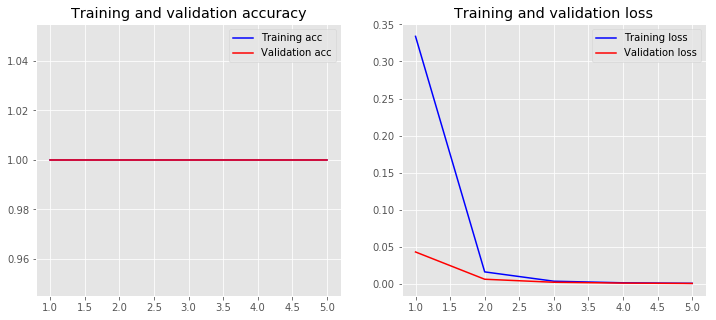

In [54]:
history = model.fit(X_train, y_train,epochs=5
                    ,verbose=False,
                    validation_data=(X_test, y_test),batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [42]:
import matplotlib.pyplot as plt

In [43]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()